In [2]:
library(Biostrings)
library(data.table)
library(ggplot2)
library(dplyr)
library(ggrepel)

In [3]:
output_dir = "/scratch/lab_bock/shared/projects/compEpi/validation/insilicoDigest/model/"

In [4]:
file_list = list.files(output_dir, pattern="*/*_overlap_stats_final.tsv", recursive = T)

In [5]:
read_df <- function(file_path){
print(file_path)
df <- read.table(file.path(output_dir, file_path), sep = "\t")
df <- df[, c(-3)]
colnames(df) <- c('CpGs','CpGs_in_RRBS')
df["type"] <- row.names(df)
df["genome_id"] <- strsplit(file_path, "/")[[1]][1]
return(df)
}

In [6]:
df_list <- sapply(file_list, read_df, simplify = FALSE)

[1] "Acalifornica/aplCal1_overlap_stats_final.tsv"
[1] "Acarolinensis/anoCar2_overlap_stats_final.tsv"
[1] "Achrysaetos/aquChr2_overlap_stats_final.tsv"
[1] "Amississippiensis/allMis1_overlap_stats_final.tsv"
[1] "Btaurus/bosTau9_overlap_stats_final.tsv"
[1] "Cephalochordata/braFlo1_overlap_stats_final.tsv"


Warning message in read.table(file.path(output_dir, file_path), sep = "\t"):
“incomplete final line found by readTableHeader on '/scratch/lab_bock/shared/projects/compEpi/validation/insilicoDigest/model//Cephalochordata/braFlo1_overlap_stats_final.tsv'”


[1] "Cfamiliaris/canFam3_overlap_stats_final.tsv"
[1] "Cmilii/calMil1_overlap_stats_final.tsv"
[1] "Csabaeus/chlSab2_overlap_stats_final.tsv"
[1] "Csimum/cerSim1_overlap_stats_final.tsv"
[1] "Drerio/danRer11_overlap_stats_final.tsv"
[1] "Fcatus/felCat9_overlap_stats_final.tsv"
[1] "Gfortis/geoFor1_overlap_stats_final.tsv"
[1] "Ggallus/galGal6_overlap_stats_final.tsv"
[1] "Ggorilla/gorGor6_overlap_stats_final.tsv"
[1] "Hglaber/hetGla2_overlap_stats_final.tsv"
[1] "Hsapiens/hg38_overlap_stats_final.tsv"
[1] "Itridecemlineatus/speTri2_overlap_stats_final.tsv"
[1] "Mdomestica/monDom5_overlap_stats_final.tsv"
[1] "Mfuro/musFur1_overlap_stats_final.tsv"
[1] "Mmulatta/rheMac10_overlap_stats_final.tsv"
[1] "Mmusculus/mm10_overlap_stats_final.tsv"
[1] "Mundulatus/melUnd1_overlap_stats_final.tsv"
[1] "Oaries/oviAri4_overlap_stats_final.tsv"
[1] "Ocuniculus/oryCun2_overlap_stats_final.tsv"
[1] "Oniloticus/oreNil2_overlap_stats_final.tsv"
[1] "Pabelii/ponAbe3_overlap_stats_final.tsv"
[1] "Pmarinus

In [7]:
summary_df <- rbindlist(df_list)

In [8]:
setDT(summary_df)

In [9]:
summary_df[, ratio:=summary_df$CpGs_in_RRBS/summary_df$CpGs,]

In [10]:
annot_df <- read.table("../meta//validation_species_resources.csv",sep = ";", header = 1, stringsAsFactors = FALSE)
head(annot_df)

species,ucsc_genome,class,scientific_name,date,name,BSlibrary,genome_id,provider
Human,hg38,Mammalia,Homo sapiens,Dec. 2013,Genome Reference Consortium GRCm38,BSgenome.Hsapiens.UCSC.hg38,Hsapiens,UCSC
Mouse,mm10,Mammalia,Mus musculus,Dec. 2011,Genome Reference Consortium GRCm38,BSgenome.Mmusculus.UCSC.mm10,Mmusculus,UCSC
Zebrafish,danRer11,Actinopteri,Danio rerio,May 2017,Genome Reference Consortium GRCz11,BSgenome.Drerio.UCSC.danRer11,Drerio,UCSC
Chicken,galGal6,Aves,Gallus gallus,Mar. 2018,GRCg6 Gallus-gallus-6.0,BSgenome.Ggallus.UCSC.galGal6,Ggallus,UCSC
Zebra finch,taeGut2,Aves,Taeniopygia guttata,Feb. 2013,WashU taeGut324,BSgenome.Tguttata.UCSC.taeGut2,Tguttata,UCSC
Opossum,monDom5,Marsupiala,Monodelphis domestica,Oct. 2006,Broad Institute release MonDom5,BSgenome.Mdomestica.UCSC.monDom5,Mdomestica,UCSC


In [10]:
annot_df[annot_df$genome_id %in% c("Lchalumnae", "Itridecemlineatus","Pmarinus"), ]

,species,ucsc_genome,class,scientific_name,date,name,BSlibrary,genome_id,provider
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
15,Lamprey,petMar2,Jawless Vertebrate,Petromyzon marinus,Sep. 2010,WUGSC 7.0,BSgenome.Pmarinus.UCSC.petMar2,Pmarinus,custom_from_UCSC
20,Coelacanth,latCha1,Actinopteri,Latimeria chalumnae,Aug. 2011,Broad Institute LatCha1,BSgenome.Lchalumnae.UCSC.latCha1,Lchalumnae,custom_from_UCSC
43,Squirrel,speTri2,Mammalia,Ictidomys tridecemlineatus,Nov. 2011,Broad Institute SpeTri2.0,BSgenome.Itridecemlineatus.UCSC.speTri2,Itridecemlineatus,custom_from_UCSC


In [11]:
summary_df <- left_join(summary_df, annot_df[, c("genome_id", "species", "class")])

Joining, by = "genome_id"



In [12]:
class_colors <- c("Invertebrata" = "#cfcfcf",
                  "Chondrichthyes" = "#F68383", 
                  "Actinopteri" = "#EA4142",
                  "Amphibia" = "#5AB349",
                  "Reptilia" = "#8761AC",
                  "Aves"="#FE9222",
                  "Marsupialia"="#8EBFDA",
                  "Mammalia"="#4892C2")

In [13]:
head(summary_df)

CpGs,CpGs_in_RRBS,type,genome_id,ratio,species,class
<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>
15636750,4818189,total,Acalifornica,0.3081324,Sea Hare,Invertebrata
721754,353752,cpgIslandExt,Acalifornica,0.4901282,Sea Hare,Invertebrata
629491,66575,rmsk,Acalifornica,0.1057601,Sea Hare,Invertebrata
7241163,2250323,transcripts,Acalifornica,0.3107682,Sea Hare,Invertebrata
727623,220061,promoters1000_500,Acalifornica,0.3024382,Sea Hare,Invertebrata
20209348,5260595,total,Acarolinensis,0.2603050,Lizard,Reptilia


In [20]:
citation("rr2")


To cite rr2 in publications use:

  Anthony R. Ives (2018). R^2s for Correlated Data: Phylogenetic
  Models, LMMs, and GLMMs. Systematic Biology, syy060.
  https://doi.org/10.1093/sysbio/syy060

  Anthony R. Ives and Daijiang Li (2018). rr2: An R package to
  calculate R^2s for regression models. The Journal of Open Source
  Software, 3(30), 1028. https://doi.org/10.21105/joss.01028

To see these entries in BibTeX format, use 'print(<citation>,
bibtex=TRUE)', 'toBibtex(.)', or set
'options(citation.bibtex.max=999)'.


In [17]:
summary_df %>% select(species, class) %>% unique %>% group_by(class) %>% summarize(n = n())

`summarise()` ungrouping output (override with `.groups` argument)



class,n
<chr>,<int>
Actinopteri,3
Amphibia,1
Aves,5
Chondrichthyes,1
Invertebrata,2
Jawless Vertebrate,1
Mammalia,19
Marsupiala,1
Reptilia,3


In [14]:
summary_df[summary_df$class == "Marsupiala", class:= "Marsupialia",]

In [15]:
summary_df[summary_df$type == "rmsk", type:= "repeats",]
summary_df[summary_df$type == "simpleRepeat", type:= "repeats",]
summary_df[summary_df$type == "cpgIslandExt", type:= "CpG Islands",]
summary_df[summary_df$type == "promoters1000_500", type:= "promoters",]

In [16]:
summary_df$class <- factor(summary_df$class, levels = names(class_colors))

In [17]:
summary_df[summary_df$class == "Amphibia",]

CpGs,CpGs_in_RRBS,type,genome_id,ratio,species,class
<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<fct>
18702552,3288567,total,Xtropicalis,0.1758352,Tropical clawed frog,Amphibia
374988,146482,CpG Islands,Xtropicalis,0.3906312,Tropical clawed frog,Amphibia
8173015,1499445,transcripts,Xtropicalis,0.1834629,Tropical clawed frog,Amphibia
700341,182344,promoters,Xtropicalis,0.2603646,Tropical clawed frog,Amphibia
8711489,1658201,repeats,Xtropicalis,0.1903464,Tropical clawed frog,Amphibia


In [18]:
unique(summary_df$type)

[1] "total"       "CpG Islands" "repeats"     "transcripts" "promoters"

In [19]:
summary_df <- summary_df[order(summary_df$class),]

In [20]:
summary_df$type <- factor(summary_df$type, levels = c("total", "transcripts", "promoters",
                                                      "repeats", "CpG Islands"))

In [21]:
##abbreviations for plotting
class_short <- c("Invertebrata" = "Inv.", "Chondrichthyes" = "Ch.",
                 "Actinopteri" = "Act.", "Amphibia" = "Amp.", 
                 "Reptilia" = "Rep.", "Aves" = "Av.", 
                 "Marsupialia" = "Mar.", "Mammalia" = "Mam.")

In [22]:
unique(summary_df$class)

[1] Invertebrata   Chondrichthyes Actinopteri    Amphibia       Reptilia      
[6] Aves           Marsupialia    Mammalia       <NA>          
8 Levels: Invertebrata Chondrichthyes Actinopteri Amphibia Reptilia ... Mammalia

In [23]:
summary_df[is.na(summary_df$class),]

CpGs,CpGs_in_RRBS,type,genome_id,ratio,species,class
<int>,<int>,<fct>,<chr>,<dbl>,<chr>,<fct>
27449514,10313485,total,Pmarinus,0.3757256,Lamprey,NA
3496508,1797614,CpG Islands,Pmarinus,0.5141169,Lamprey,NA
7342580,2884431,transcripts,Pmarinus,0.3928362,Lamprey,NA
1513578,645812,promoters,Pmarinus,0.4266790,Lamprey,NA
3048003,964718,repeats,Pmarinus,0.3165082,Lamprey,NA


In [24]:
summary_df[summary_df$species == "Lamprey", class:= "Invertebrata",]

In [25]:
summary_df[, group:=class_short[class],]

In [26]:
summary_df$group <- factor(summary_df$group, levels = class_short)

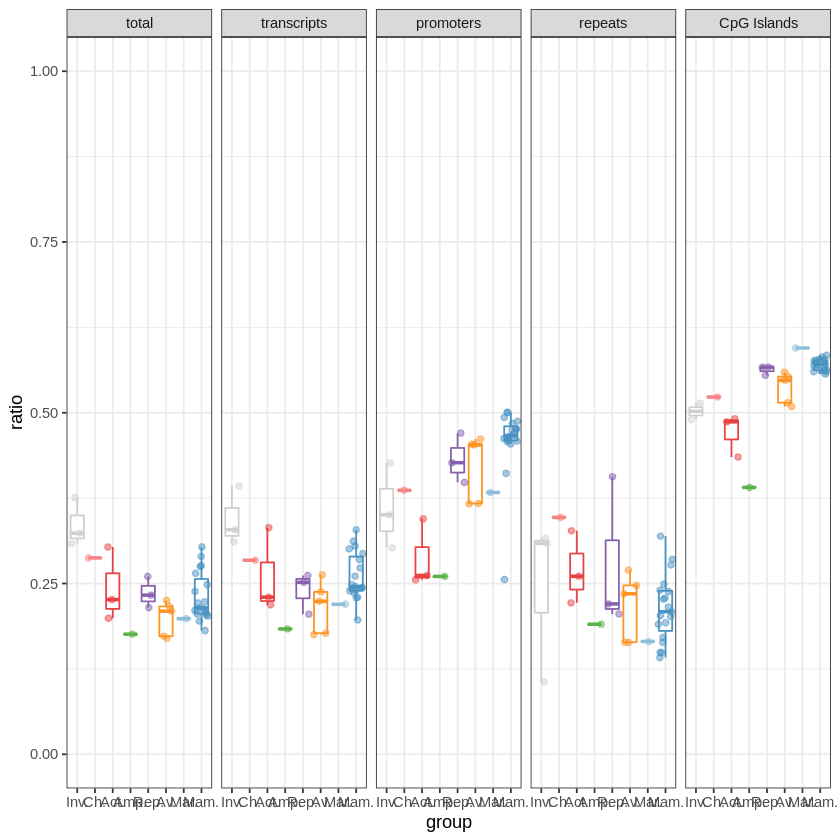

In [27]:
ggplot(summary_df, aes(x = group, y = ratio, color = class)) + geom_boxplot(outlier.shape = NA) + 
geom_jitter(alpha = 0.5) + facet_wrap(~type, nrow = 1) + 
        theme_bw() + ylim(c(0,1)) + 
        theme( legend.position = "None") +
        scale_color_manual(values = class_colors) 
ggsave(file.path(output_dir, "summary_boxplots.pdf"), width = 12, height = 3 )

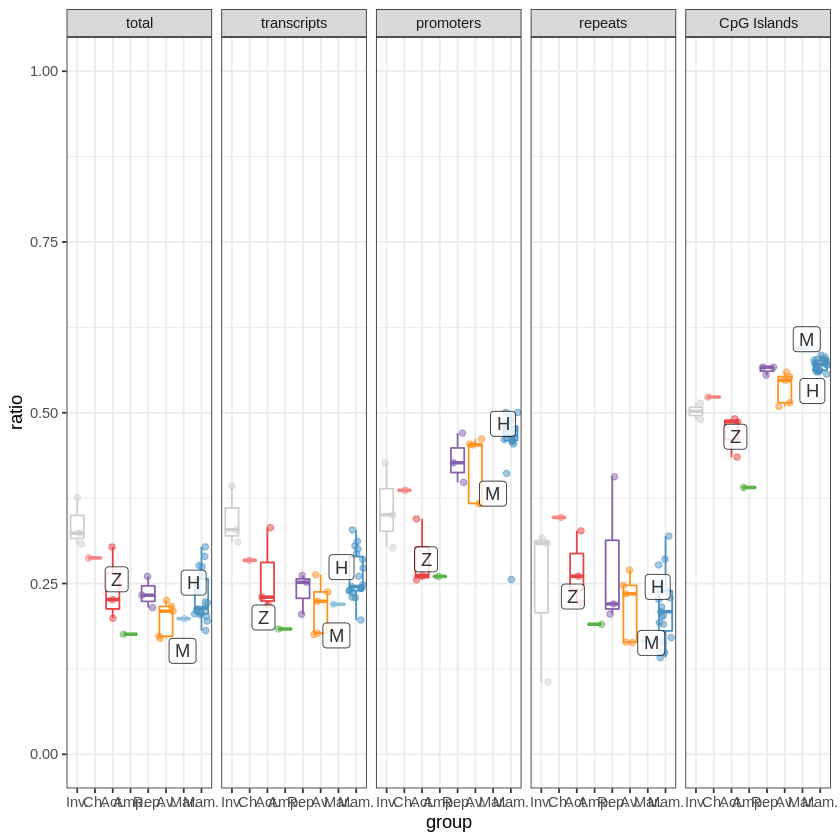

In [41]:
ggplot(summary_df, aes(x = group, y = ratio, color = class)) + geom_boxplot(outlier.shape = NA) + 
geom_jitter(alpha = 0.5) + facet_wrap(~type, nrow = 1) + 
        theme_bw() + ylim(c(0,1)) + 
        theme( legend.position = "None") +
        scale_color_manual(values = class_colors)  + 
        geom_label_repel(data = summary_df[species %in% c("Human", "Mouse", "Zebrafish")], 
                        aes(x = group, y = ratio, label = substr(species, 1, 1)), color = "black", alpha = 0.8)
ggsave(file.path(output_dir, "summary_boxplots_names.pdf"), width = 12, height = 3 )

In [ ]:
viz_sp = c("Mmusculus",)

In [ ]:
ggplot(summary_df, aes(x = group, y = ratio, color = class)) + geom_boxplot(outlier.shape = NA) + 
geom_jitter(alpha = 0.5) + facet_wrap(~type, nrow = 1) + 
        theme_bw() + ylim(c(0,1)) + 
        theme( legend.position = "None") +
        scale_color_manual(values = class_colors) + geom_text(data = summary_df)

In [56]:
summary_df[class=="Mammalia" & type == "promoters" & ratio < 0.45,]

CpGs,CpGs_in_RRBS,type,genome_id,ratio,species,class,group
<int>,<int>,<fct>,<chr>,<dbl>,<chr>,<fct>,<fct>
254,65,promoters,Csabaeus,0.2559055,Green Monkey,Mammalia,Mam.
1591393,654376,promoters,Mmusculus,0.4111970,Mouse,Mammalia,Mam.


In [57]:
write.table(summary_df, file.path(output_dir, "summary_df.tsv"), quote = F, row.names = F, sep = ";") 

### Chrecking which species faled

In [16]:
chrLengthStats <- read.table("/scratch/lab_bock/shared/projects/compEpi/validation/insilicoDigest/chromSizeStats.tsv", sep = "\t")

In [18]:
setDT(chrLengthStats)

In [21]:
head(chrLengthStats)

Name,genome,nchr,chrSumLength,chrSumLength_100
Human,hg38,455,3209286105,3171759732
Mouse,mm10,66,2730871774,2730871774
Zebrafish,danRer11,1923,1679203469,1390091111
Chicken,galGal6,464,1065365425,1062298020
Zebra finch,taeGut2,37096,1232135591,1047003328
Opossum,monDom5,11,3605631728,3605631728


In [25]:
length(setdiff(chrLengthStats$Name, summary_df$species))

[1] 12

In [28]:
chrLengthStats[, failed:=ifelse(chrLengthStats$Name %in% summary_df$species, "success", "fail"),]

In [27]:
chrLengthStats$Name %in% summary_df$species

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE
[25]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE
[37] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE

In [30]:
chrLengthStats

Name,genome,nchr,chrSumLength,chrSumLength_100,failed
Human,hg38,455,3209286105,3171759732,success
Mouse,mm10,66,2730871774,2730871774,success
Zebrafish,danRer11,1923,1679203469,1390091111,success
Chicken,galGal6,464,1065365425,1062298020,success
Zebra finch,taeGut2,37096,1232135591,1047003328,success
Opossum,monDom5,11,3605631728,3605631728,success
Cow,bosTau9,2211,2715853792,2657896138,success
Dog,canFam3,3268,2410976875,2356725059,success
Ferret,musFur1,7741,2410758013,1458360456,success
Chimp,panTro6,4346,3050398082,2888958340,success


In [32]:
NROW(chrLengthStats[failed == "fail"])

[1] 12

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



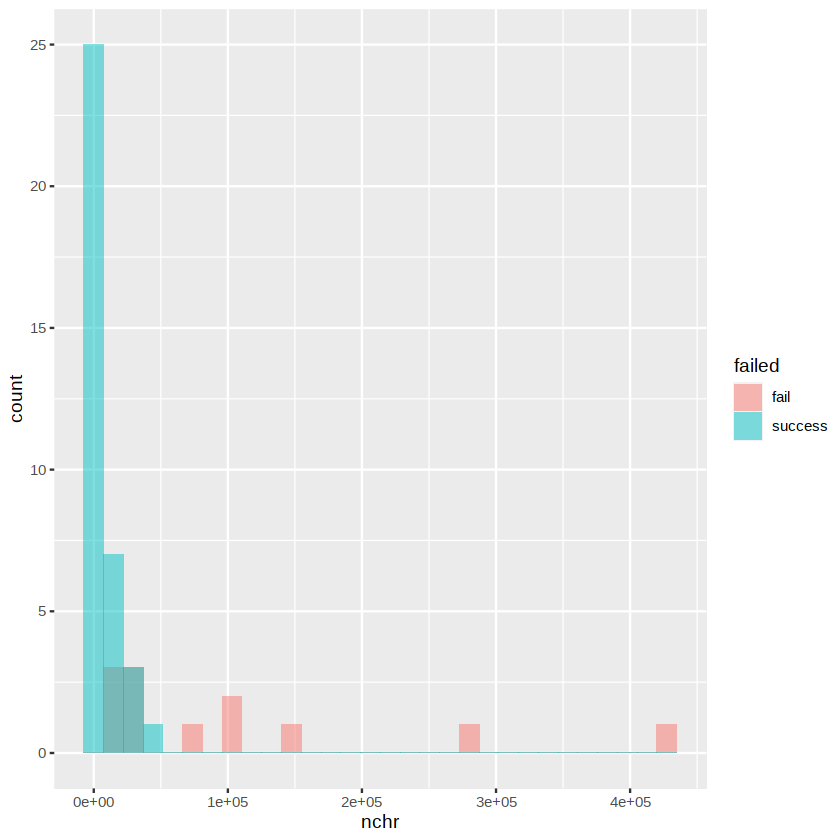

In [38]:
ggplot(chrLengthStats, aes(x = nchr, fill = failed)) + geom_histogram(position = "identity", alpha = 0.5)

In [39]:
chrLengthStats[, ratioL:= chrSumLength_100/chrSumLength, ]

In [44]:
library(ggrepel)

In [51]:
pdf(file.path(output_dir, "failedStats.pdf"), width = 6, height = 5)
ggplot(chrLengthStats, aes(x = ratioL, y = nchr, color = failed)) + geom_point() + 
geom_label_repel(data = chrLengthStats[failed == "fail"], aes(x = ratioL, y = nchr, color = failed, label = Name)) + theme_bw()
ggplot(chrLengthStats, aes(x = chrSumLength, y = nchr, color = failed)) + geom_point() + 
geom_label_repel(data = chrLengthStats[failed == "fail"], aes(x = chrSumLength, y = nchr,color = failed, label = Name)) + theme_bw()
ggplot(chrLengthStats, aes(x = chrSumLength, y = chrSumLength_100, color = failed)) + geom_point() + 
geom_label_repel(data = chrLengthStats[failed == "fail"], aes(x = chrSumLength, y = chrSumLength_100,color = failed, label = Name)) + theme_bw()
dev.off()

png 
  2

In [53]:
chrLengthStats %>% group_by(failed) %>% summarise(medianL = median(chrSumLength), medianN = median(nchr))

failed,medianL,medianN
fail,2654089754,58479.0
success,2437672028,4884.5


In [54]:
median(chrLengthStats$nchr)

[1] 6828.5

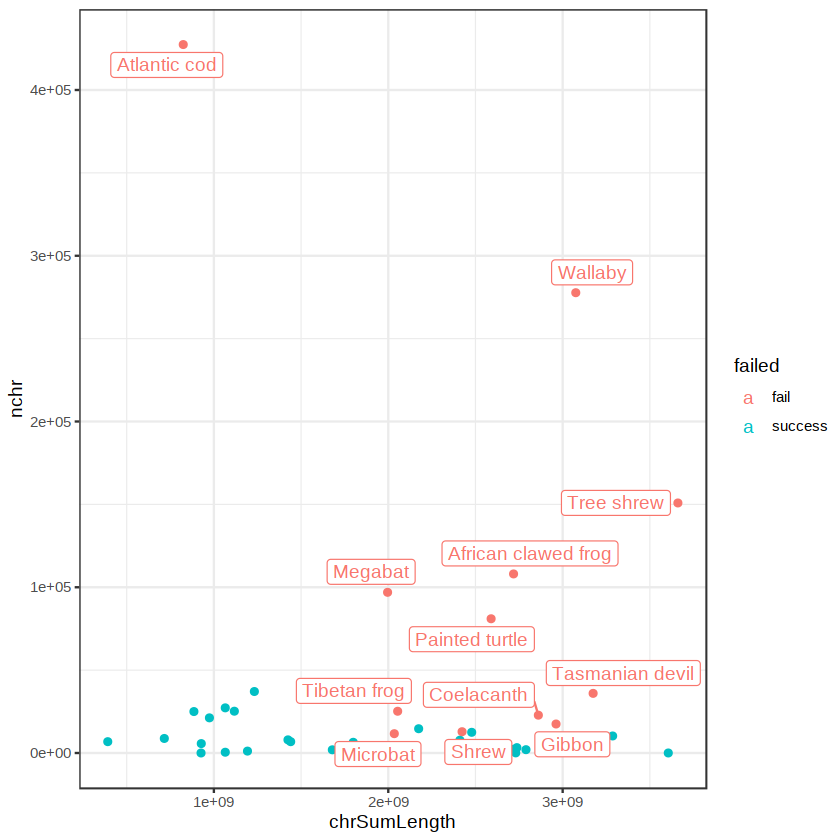

In [48]:
ggplot(chrLengthStats, aes(x = chrSumLength, y = nchr, color = failed)) + geom_point() + 
geom_label_repel(data = chrLengthStats[failed == "fail"], aes(x = chrSumLength, y = nchr,color = failed, label = Name)) + theme_bw()